# Ejercicios semana 1 - Árboles de Decisión

El objetivo de los ejercicios de esta semana es integrar lo que aprendimos de modelos de árboles de decisión en un caso donde la frontera de decisión es compleja.

## Hagamos lunas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

Vamos a utilizar una función que nos va a acompañar durante las próximas clases. Esta función sirve para generar un dataset sintético más o menos complicado (pero en pocas dimensiones)

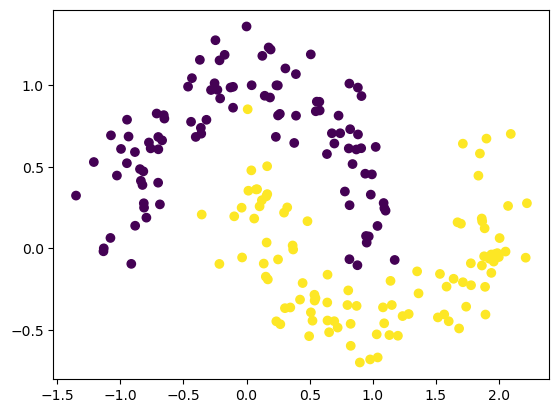

In [ ]:
X, t = make_moons(n_samples=200, noise=0.15, random_state=42)

plt.scatter(X[:,0], X[:,1], c=t)

1. Entrenar un DecisionTreeClassifier con estos datos, usando como hiperparámetros valores elegidos a mano (cambien `max_depth` y dos hiperámetros más a elección).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)

2. Evaluar el resultado con validación cruzada, usando como métrica la exactitud (accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, t, cv=5, scoring='accuracy')

print('Exactitud = {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Exactitud = 0.91 +/- 0.04


3. Usar GridSearchCV o RandomizedSearchCV para encontrar los mejores valores de los hiperparámetros elegidos (y `max_depth`). **Ayuda**: pueden usar `n_jobs=-1` para usar todos los procesadores que tengan disponibles.

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_dt = GridSearchCV(dt, param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                                     'min_impurity_decrease': [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]},
                     cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
gs_dt.fit(X, t)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_impurity_decrease': [0, 0.01, 0.05, 0.1, 0.2, 0.3,
                                                   0.5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

4. Impriman en pantalla el valor de los mejores parámetros y el valor del score para estos valores.

In [ ]:
print('Los mejores parámetros son', gs_dt.best_params_)
print('El mejor score es {:.2f}'.format(gs_dt.best_score_))

Los mejores parámetros son {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_leaf': 4}
El mejor score es 0.97


5. Graficar la frontera de decisión usando el código `plot_decision_boundary`

In [ ]:
# Función adaptada de A. Gèron
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, t, axes=[0, 7.5, 0, 3], is_iris=True,
                           legend=False, plot_training=True, ngridpoints=200,
                           alpha=1.0, ax=None):

    # Prepara los arreglos para colorear
    x1s = np.linspace(axes[0], axes[1], ngridpoints)
    x2s = np.linspace(axes[2], axes[3], ngridpoints)

    # los convierte en una grilla
    x1, x2 = np.meshgrid(x1s, x2s)

    # Calcula las predicciones sobre la grilla
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    if ax is None:
        ax = plt.figure().add_subplot(111)

    # Grafica con colores esa grilla
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if not is_iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        sct = ax.scatter(X[:,0], X[:, 1], c=t, edgecolors='k', s=9**2,
                  cmap=plt.cm.rainbow, alpha=alpha)

        # plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        # plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        # plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        # plt.axis(axes)
    if is_iris:
        legend1 = ax.legend(sct.legend_elements()[0], iris.target_names,
                            loc="upper left", title="Clases")
        ax.add_artist(legend1)

        ax.set_xlabel("Largo del pétalo", fontsize=16)
        ax.set_ylabel("Ancho del pétalo", fontsize=16)
    else:
        ax.set_xlabel(r"$x_1$", fontsize=18)
        ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        ax.legend(loc="lower right", fontsize=14)

<Figure size 1200x800 with 0 Axes>

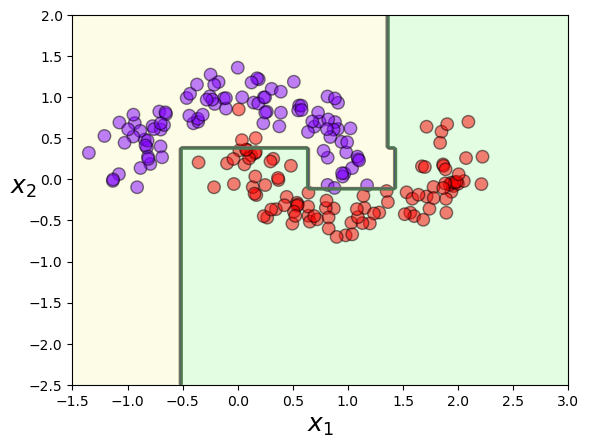

In [ ]:

plt.figure(figsize=(12, 8))
plot_decision_boundary(gs_dt, X, t,
                       alpha=0.5, is_iris=False,
                       axes=[-1.5, 3, -2.5, 2.0])

plt.show()

6. Cambiar los valores del ruido y cantidad de puntos en la función que genera los datos y ver la dependencia de la calidad del estimador frente a esos parámetros adicionales.